___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

## INTRODUCTION

This is a "***Sentiment Analysis and Classification***" project.

This study focus on using Natural Language Techniques to find broad trends in the written thoughts of the customers. 
The goal of this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the **Review Text** variable using text mining techniques. 

Sentiment classification models are developed by using algorithms ***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning***.

***Noise removal*** and ***lexicon Normalization*** processes are applied by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

***Word Cloud*** is implement as a visual analysis of word repetition.

Five different algorithms are developed and compared. 

## DATA UNDERSTANDING

The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.

The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 

Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.





## Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [75]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn.feature_extraction.text import  TfidfTransformer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter

from wordcloud import WordCloud

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sedat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sedat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sedat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
def missing_values(df):
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)


In [4]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df.shape

(23486, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [7]:
missing_values(df)

,Missing_Records,Percentage (%)
Title,3810,16.222430
Review Text,845,3.597888
Division Name,14,0.059610
Department Name,14,0.059610
Class Name,14,0.059610


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,23486.0,11742.500000,6779.968547,0.0,5871.25,11742.5,17613.75,23485.0
Clothing ID,23486.0,918.118709,203.298980,0.0,861.00,936.0,1078.00,1205.0
Age,23486.0,43.198544,12.279544,18.0,34.00,41.0,52.00,99.0
Rating,23486.0,4.196032,1.110031,1.0,4.00,5.0,5.00,5.0
Recommended IND,23486.0,0.822362,0.382216,0.0,1.00,1.0,1.00,1.0
Positive Feedback Count,23486.0,2.535936,5.702202,0.0,0.00,1.0,3.00,122.0


### Data Wrangling


#### Check Proportion of Target Class Variable

In [9]:
df['Recommended IND'].value_counts(normalize = True)

1    0.822362
0    0.177638
Name: Recommended IND, dtype: float64

The target class variable is imbalanced

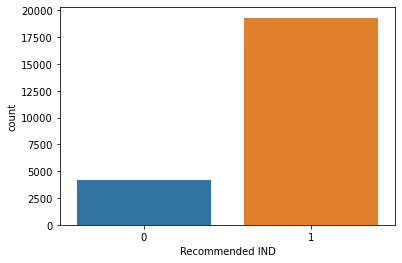

In [10]:
sns.countplot(df['Recommended IND']);

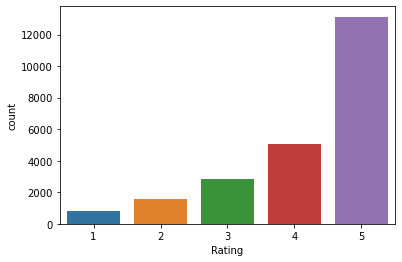

In [11]:
sns.countplot(df.Rating);

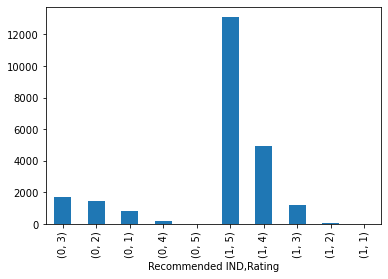

In [12]:
df.groupby('Recommended IND')['Rating'].value_counts().plot.bar();

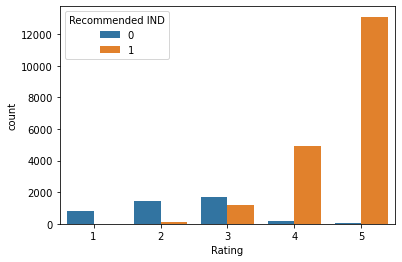

In [13]:
sns.countplot(x='Rating',data=df, hue='Recommended IND');

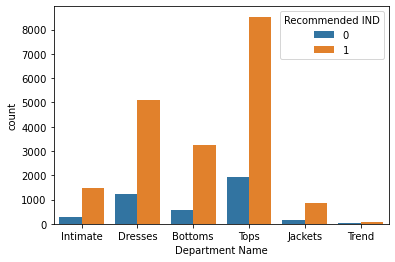

In [14]:
sns.countplot(x='Department Name',data=df, hue='Recommended IND' );

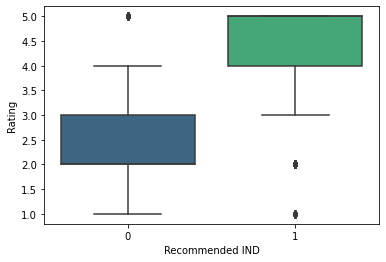

In [15]:
sns.boxplot(x='Recommended IND',y='Rating',data=df, palette='viridis');

## Feature Selection and Data Cleaning

Created new dataframe with **"Review Text"** and **"Recommended IND"**. 



### Feature Selection and Rename Column Name

In [16]:
df_new = df[['Review Text','Recommended IND']]
df_new.columns = ['text','label']
df_new.head()

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


### Missing Value Detection

In [17]:
missing_values(df_new)

,Missing_Records,Percentage (%)
text,845,3.597888


In [18]:
df_new.dropna(inplace=True)
df_new.shape

(22641, 2)

## Text Preprocessing

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.

- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 



### Tokenization & Removing Puctiations and Stopwords & Lemmatization

In [19]:
stop_words = stopwords.words('english')
lem=WordNetLemmatizer()

df_new["text"]=df_new["text"].apply(lambda x: word_tokenize(x.lower()))
df_new["text"]=df_new["text"].apply(lambda x: list(i for i in x if i.isalpha()))
df_new["text"]=df_new["text"].apply(lambda x: list(i for i in x if i not in stop_words))
df_new["text"]=df_new["text"].apply(lambda x: list(lem.lemmatize(i) for i in x))
df_new["text"]=df_new["text"].apply(lambda x: " ".join(x))
df_new.head()

,text,label
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store gla...,1
2,high hope dress really wanted work initially o...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1


### Noise Removal

In [20]:
rare_words = pd.Series(" ".join(df_new["text"]).split()).value_counts()[pd.Series(" ".join(df_new["text"]).split()).value_counts() <=2]
df_new["text"] = df_new["text"].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))
df_new.head()

,text,label
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store gla...,1
2,high hope dress really wanted work initially o...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1


## WordCloud - Repetition of Words

Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

Create separate word clouds for positive and negative reviews. 



### Create Word Cloud for All

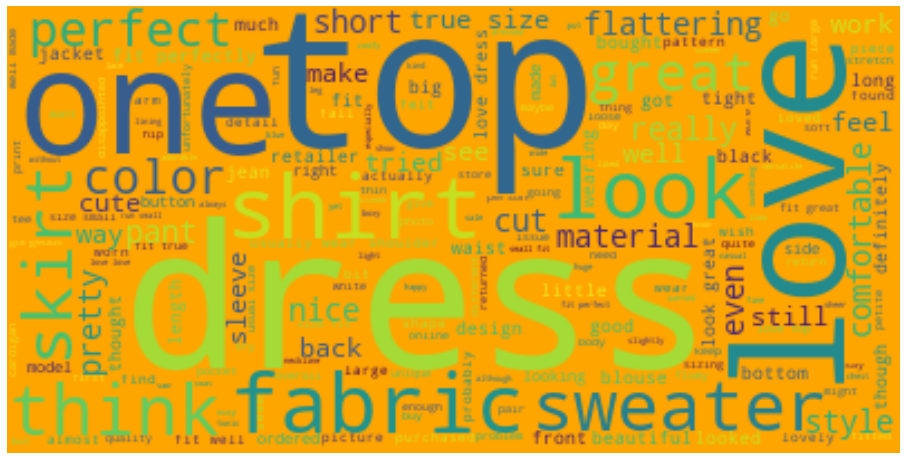

In [21]:
wordcloud_all = WordCloud(background_color="orange").generate(' '.join(df_new['text']))
plt.figure(figsize=(16,12))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.show();

### Detect Reviews (positive and negative separately)

In [22]:
df_positive = df_new[df_new['label']==1]
df_negative = df_new[df_new['label']==0]

print('Positive Review Shape:', df_positive.shape)
print('Negative Review Shape:', df_negative.shape)

Positive Review Shape: (18540, 2)
Negative Review Shape: (4101, 2)


### Collect Words (positive and negative separately)

In [23]:
pos_wordcloud = WordCloud(background_color="white").generate(' '.join(df_positive['text']))
neg_wordcloud = WordCloud().generate(' '.join(df_negative['text']))

### Create Word Cloud for Positives

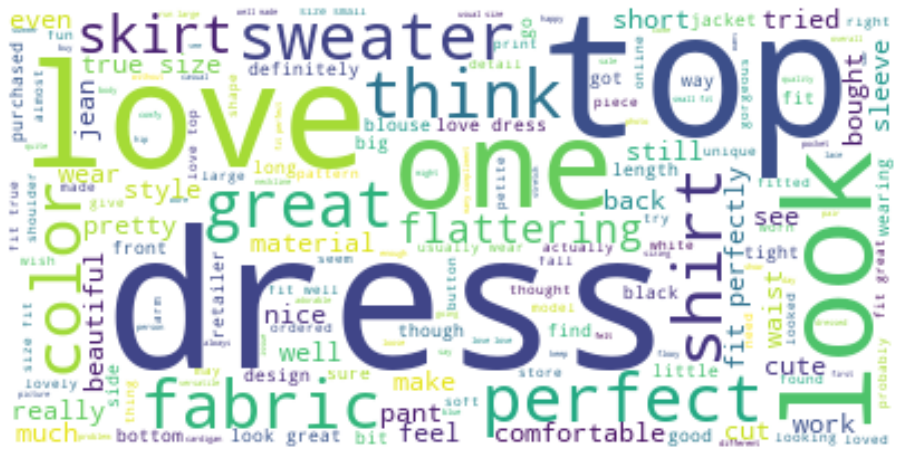

In [24]:
plt.figure(figsize=(16,12))
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show();

### Create Word Cloud for Negatives

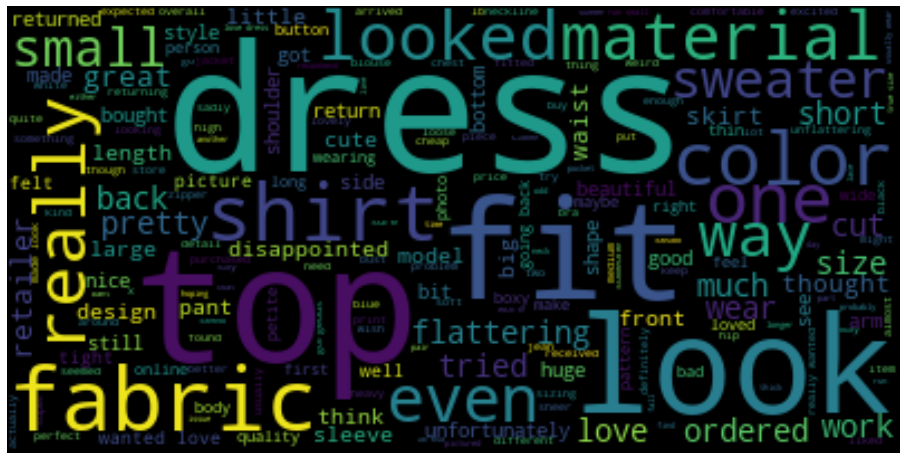

In [25]:
plt.figure(figsize=(16,12))
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show();

## Sentiment Classification with Machine Learning

Before to modeling, it is time to to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. 

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, it is necessary to convert each document into a numeric vector. This process is known as text vectorization. 



### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new['text'], df_new['label'], test_size = 0.3, random_state = 42)

### Vectorization

In [27]:
vectorizer = CountVectorizer().fit(X_train)
X_train_vect = vectorizer.transform(X_train)
X_test_vect = vectorizer.transform(X_test)

### TF-IDF

In [29]:
tfidf_vec = TfidfVectorizer().fit(X_train)
X_train_tfidf = tfidf_vec.transform(X_train)
X_test_tfidf = tfidf_vec.transform(X_test)

### Logistic Regression with Count Vectorizer

In [33]:
log_vect = linear_model.LogisticRegression()
log_vect.fit(X_train_vect, y_train)
y_pred = log_vect.predict(X_test_vect)

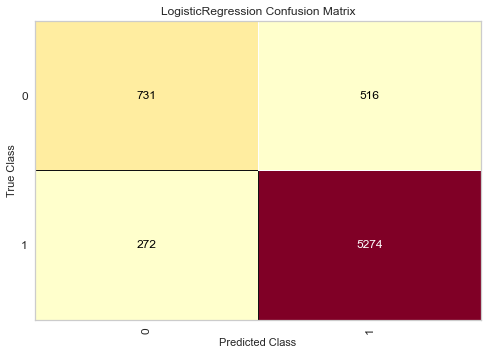

In [34]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(log_vect)
cm.fit(X_train_vect, y_train)
cm.score(X_test_vect, y_test)
cm.show();

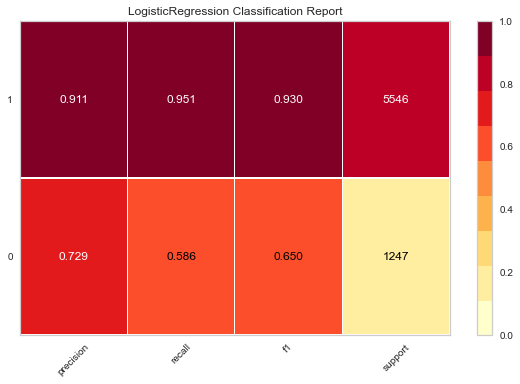

In [35]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(log_vect, support=True)
visualizer.fit(X_train_vect, y_train)       
visualizer.score(X_test_vect, y_test)       
visualizer.show();

In [36]:
log_vect = linear_model.LogisticRegression()
log_vect.fit(X_train_vect, y_train)
log_vect_accuracy = model_selection.cross_val_score(log_vect,
                                           X_test_vect,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", log_vect_accuracy)

Count Vectors Accuracy: 0.8763451875595599


### Logistic Regression with TF-IDF

In [39]:
log_tfidf = linear_model.LogisticRegression()
log_tfidf.fit(X_train_tfidf, y_train)
y_pred = log_tfidf.predict(X_test_tfidf)

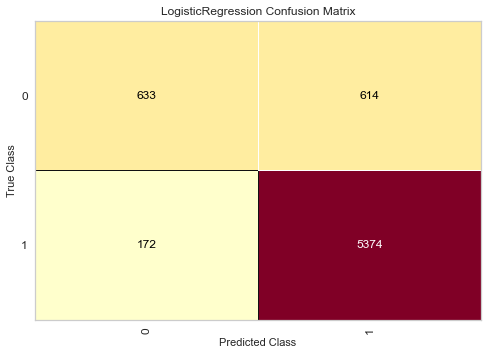

In [40]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(log_tfidf)
cm.fit(X_train_tfidf, y_train)
cm.score(X_test_tfidf, y_test)
cm.show();

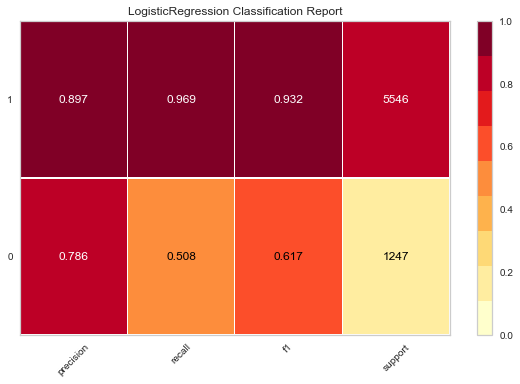

In [41]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(log_tfidf, support=True)
visualizer.fit(X_train_tfidf, y_train)       
visualizer.score(X_test_tfidf, y_test)       
visualizer.show();

In [53]:
log_tfidf = linear_model.LogisticRegression()
log_tfidf.fit(X_train_tfidf, y_train)
log_tfidf_accuracy = model_selection.cross_val_score(log_tfidf,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", log_tfidf_accuracy)

TF-IDF Accuracy: 0.873254136706229


### Naive Bayes with Count Vectorizer



In [91]:
nb_vect = MultinomialNB()
nb_vect.fit(X_train_vect, y_train)
y_pred = nb_vect.predict(X_test_vect)

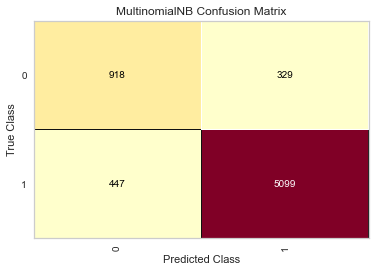

In [92]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(nb_vect)
cm.fit(X_train_vect, y_train)
cm.score(X_test_vect, y_test)
cm.show();

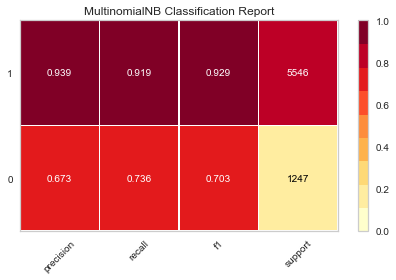

In [93]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(nb_vect, support=True)
visualizer.fit(X_train_vect, y_train)       
visualizer.score(X_test_vect, y_test)       
visualizer.show();

In [94]:
nb_vect = MultinomialNB()
nb_vect.fit(X_train_vect, y_train)
nb_vect_accuracy = model_selection.cross_val_score(nb_vect,
                                           X_test_vect,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", nb_vect_accuracy)

Count Vectors Accuracy: 0.8837070085766265


### Naive Bayes with TF-IDF

In [49]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred = nb_tfidf.predict(X_test_tfidf)

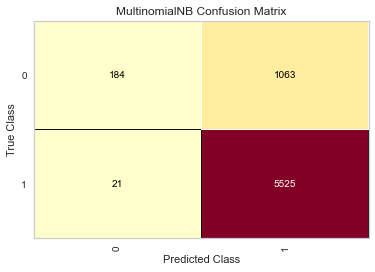

In [50]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(nb_tfidf)
cm.fit(X_train_tfidf, y_train)
cm.score(X_test_tfidf, y_test)
cm.show();

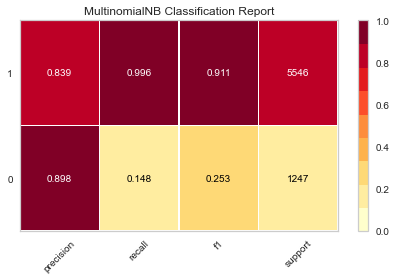

In [51]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(nb_tfidf, support=True)
visualizer.fit(X_train_tfidf, y_train)       
visualizer.score(X_test_tfidf, y_test)       
visualizer.show();

In [95]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
nb_tfidf_accuracy = model_selection.cross_val_score(nb_tfidf,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", nb_tfidf_accuracy)

TF-IDF Accuracy: 0.8212867105605127


### Support Vector Machine (SVM) with Count Vectorizer

In [56]:
svm_vect = SVC()
svm_vect.fit(X_train_vect, y_train)
y_pred = svm_vect.predict(X_test_vect)

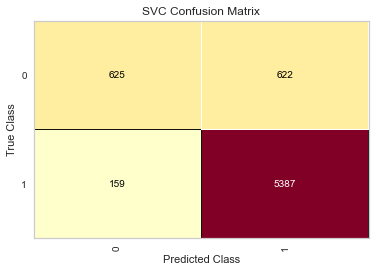

In [57]:
cm = ConfusionMatrix(svm_vect)
cm.fit(X_train_vect, y_train)
cm.score(X_test_vect, y_test)
cm.show();

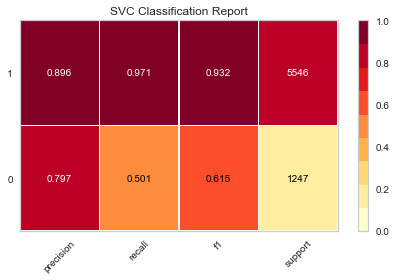

In [58]:
visualizer = ClassificationReport(svm_vect, support=True)
visualizer.fit(X_train_vect, y_train)       
visualizer.score(X_test_vect, y_test)       
visualizer.show();

In [59]:
svm_vect = SVC()
svm_vect.fit(X_train_vect, y_train)
svm_vect_accuracy = model_selection.cross_val_score(svm_vect,
                                           X_test_vect,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", svm_vect_accuracy)

Count Vectors Accuracy: 0.875018626007104


### Support Vector Machine (SVM) with TF-IDF

In [60]:
svm_tfidf = SVC()
svm_tfidf.fit(X_train_tfidf, y_train)
y_pred = svm_tfidf.predict(X_test_tfidf)

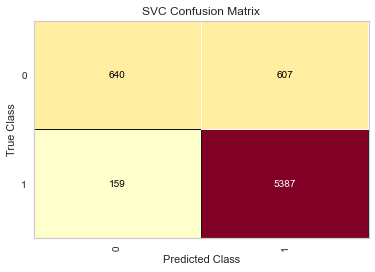

In [61]:
cm = ConfusionMatrix(svm_tfidf)
cm.fit(X_train_tfidf, y_train)
cm.score(X_test_tfidf, y_test)
cm.show();

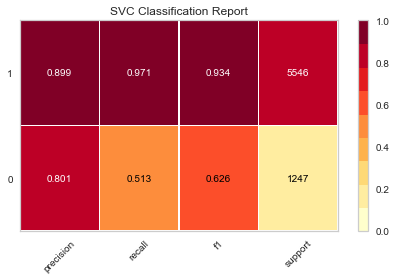

In [62]:
visualizer = ClassificationReport(svm_tfidf, support=True)
visualizer.fit(X_train_tfidf, y_train)       
visualizer.score(X_test_tfidf, y_test)       
visualizer.show();

In [65]:
svm_tfidf = SVC()
svm_tfidf.fit(X_train_tfidf, y_train)
svm_tfidf_accuracy = model_selection.cross_val_score(svm_tfidf,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", svm_tfidf_accuracy)

TF-IDF Accuracy: 0.8736944468509054


### Random Forest with Count Vectorizer

In [67]:
rf_vect = RandomForestClassifier()
rf_vect.fit(X_train_vect, y_train)
y_pred = rf_vect.predict(X_test_vect)

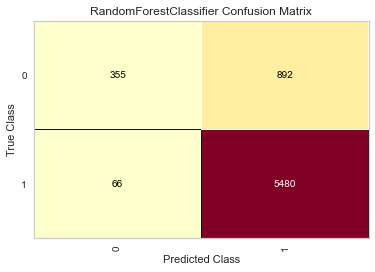

In [68]:
cm = ConfusionMatrix(rf_vect)
cm.fit(X_train_vect, y_train)
cm.score(X_test_vect, y_test)
cm.show();

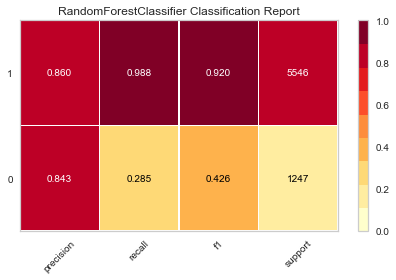

In [69]:
visualizer = ClassificationReport(rf_vect, support=True)
visualizer.fit(X_train_vect, y_train)       
visualizer.score(X_test_vect, y_test)       
visualizer.show();

In [70]:
rf_vect = RandomForestClassifier()
rf_vect.fit(X_train_vect, y_train)
rf_vect_accuracy = model_selection.cross_val_score(rf_vect,
                                           X_test_vect,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", rf_vect_accuracy)

Count Vectors Accuracy: 0.8483756389153599


### Random Forest with TF-IDF

In [71]:
rf_tfidf = RandomForestClassifier()
rf_tfidf.fit(X_train_tfidf, y_train)
y_pred = rf_tfidf.predict(X_test_tfidf)

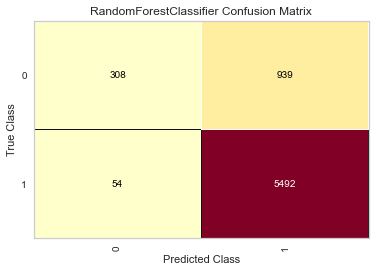

In [72]:
cm = ConfusionMatrix(rf_tfidf)
cm.fit(X_train_tfidf, y_train)
cm.score(X_test_tfidf, y_test)
cm.show();

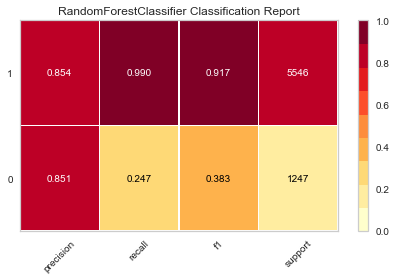

In [73]:
visualizer = ClassificationReport(rf_tfidf, support=True)
visualizer.fit(X_train_tfidf, y_train)       
visualizer.score(X_test_tfidf, y_test)       
visualizer.show();

In [74]:
rf_tfidf = RandomForestClassifier()
rf_tfidf.fit(X_train_tfidf, y_train)
rf_tfidf_accuracy = model_selection.cross_val_score(rf_tfidf,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", rf_tfidf_accuracy)

TF-IDF Accuracy: 0.8451377458199774


### Ada  Boosting with Count Vectorizer

In [76]:
ab_vect = AdaBoostClassifier()
ab_vect.fit(X_train_vect, y_train)
y_pred = ab_vect.predict(X_test_vect)

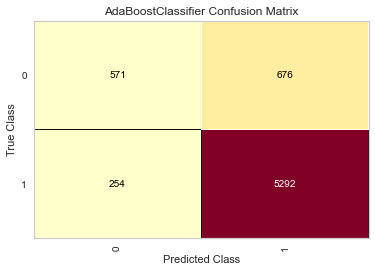

In [77]:
cm = ConfusionMatrix(ab_vect)
cm.fit(X_train_vect, y_train)
cm.score(X_test_vect, y_test)
cm.show();

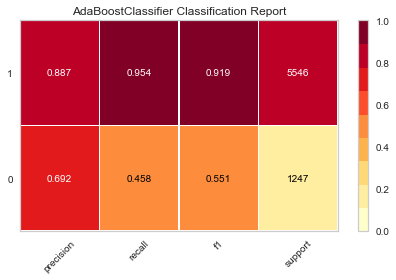

In [78]:
visualizer = ClassificationReport(ab_vect, support=True)
visualizer.fit(X_train_vect, y_train)       
visualizer.score(X_test_vect, y_test)       
visualizer.show();

In [79]:
ab_vect = AdaBoostClassifier()
ab_vect.fit(X_train_vect, y_train)
ab_vect_accuracy = model_selection.cross_val_score(ab_vect,
                                           X_test_vect,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", ab_vect_accuracy)

Count Vectors Accuracy: 0.8592703370007797


### Ada  Boosting with TF-IDF

In [80]:
ab_tfidf = AdaBoostClassifier()
ab_tfidf.fit(X_train_tfidf, y_train)
y_pred = ab_tfidf.predict(X_test_tfidf)

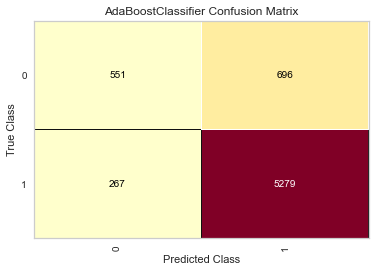

In [81]:
cm = ConfusionMatrix(ab_tfidf)
cm.fit(X_train_tfidf, y_train)
cm.score(X_test_tfidf, y_test)
cm.show();

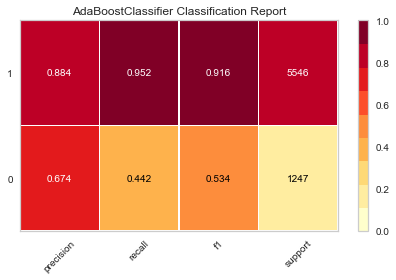

In [82]:
visualizer = ClassificationReport(ab_tfidf, support=True)
visualizer.fit(X_train_tfidf, y_train)       
visualizer.score(X_test_tfidf, y_test)       
visualizer.show();

In [83]:
ab_tfidf = AdaBoostClassifier()
ab_tfidf.fit(X_train_tfidf, y_train)
ab_tfidf_accuracy = model_selection.cross_val_score(ab_tfidf,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", ab_tfidf_accuracy)

TF-IDF Accuracy: 0.8561784198215369


### Compare of Models Accuracies 

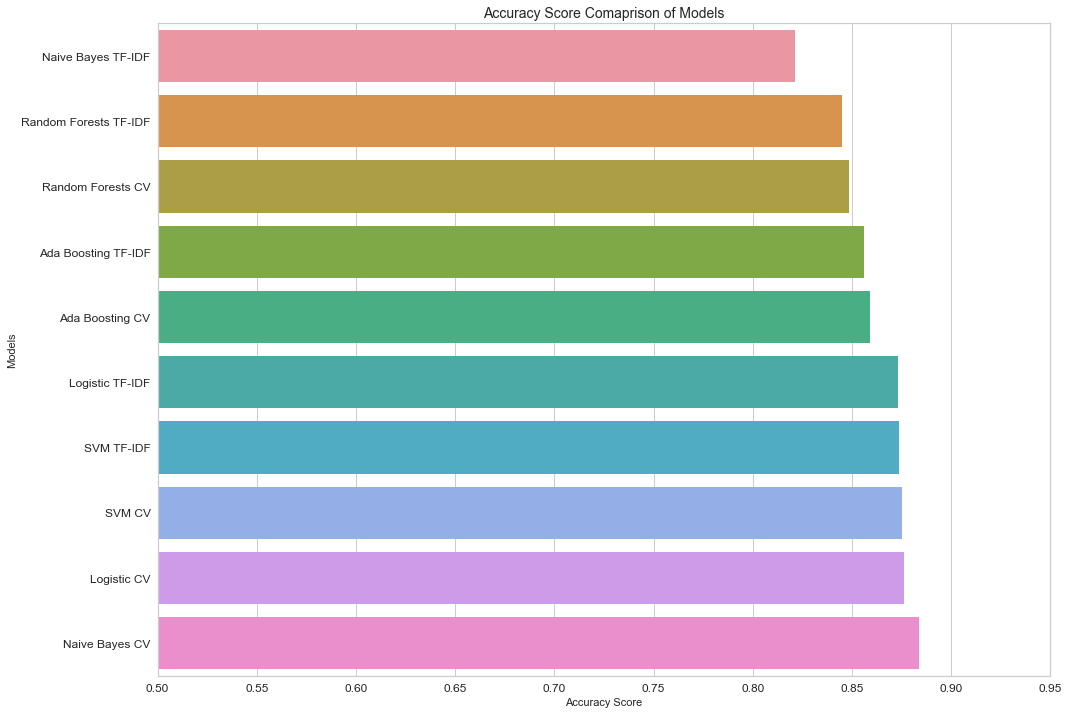

In [96]:
compare = pd.DataFrame({"Models": ["Logistic CV", "Logistic TF-IDF", "Naive Bayes CV", "Naive Bayes TF-IDF", "SVM CV", 
                                  "SVM TF-IDF", "Random Forests CV", "Random Forests TF-IDF", "Ada Boosting CV", "Ada Boosting TF-IDF" ],
                        "Accuracy Score": [log_vect_accuracy, log_tfidf_accuracy, nb_vect_accuracy, nb_tfidf_accuracy, svm_vect_accuracy, 
                                     svm_tfidf_accuracy, rf_vect_accuracy, rf_tfidf_accuracy, ab_vect_accuracy, ab_tfidf_accuracy]})
compare = compare.sort_values(by="Accuracy Score", ascending=True)
plt.figure(figsize=(16,12))
ax = sns.barplot(x="Accuracy Score", y="Models", data=compare)
ax.set_xlim(.50, .95)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title("Accuracy Score Comaprison of Models", size=14);

### Conclusion

This project was aimed to used sentiment analysis to determined product recommendation. We started with the data engineering and text mining, which cover change text into tokens, remove punctuation, numbers, stop words and normalization them by using lemmatization. Following we used bag of words model to convert the text into numerical feature vectors. Finally we started training 5 different Classification models and we got the best accuracy of 0.8837 for Naive Bayes method using Count Vectorizer. 

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___